**Name:** Kunal Anand<br>
**Student Number:** s224704431<br>
**Email:** s224704431@deakin.edu.au <br>
**Course** SIT731 (Postgraduate)


**Introduction**<br>
This report presents analysis of the daily closing price of BTC against the USD.<br>
This is focusing on mathematical operions using NumPy, statistical analysis, and data visualization.<br>
It is focused on understanding the trends and price movements in Q3 2023, with extensions to other quarters for comparison.

In [3]:
# Importing numpy 
import numpy as np

**Loading data set**  
- The code loads the cleaned BTC-USD price data from a CSV file into a NumPy array named BTC_df

In [5]:
# Loading cleaned data of BTC-USD Prices.
BTC_df = np.loadtxt("BTC-USD.csv")

In [6]:
#Extracting Q3-2023 Data for analysis.
df_q3 = BTC_df[181:273]

**Defining variables to show statistical values.**
- Which includes mean,median, IQR and mode

In [8]:
# Defining variables for Q3
Q3_mean = round(np.mean(df_q3),2)
Q3_min = round(np.min(df_q3),2)
Q3_q1 = round(np.quantile(df_q3,[.25])[0],2)
Q3_median = round(np.median(df_q3),2)
Q3_q3 = round(np.quantile(df_q3,[.75])[0],2)
Q3_max = round(np.max(df_q3),2)
Q3_std = round(np.std(df_q3),2)
Q3_IQR = round(Q3_q3-Q3_q1,2)


In [9]:
# Printing Summary Statistics for Q3
print("----Q3 2023 Summary Statistics----")
print("  Mean              :", Q3_mean)
print("  Min               :", Q3_min)
print("  Q1                :", Q3_q1)
print("  Median            :", Q3_median)
print("  Q3                :", Q3_q3)
print("  Max               :", Q3_max)
print("  Standard Deviation:", Q3_std)
print("  IQR               :", Q3_IQR)
print("----------------------------------")


----Q3 2023 Summary Statistics----
  Mean              : 28091.33
  Min               : 25162.65
  Q1                : 26225.56
  Median            : 28871.82
  Q3                : 29767.07
  Max               : 31476.05
  Standard Deviation: 1827.04
  IQR               : 3541.51
----------------------------------


In [10]:
#  Importing Necessary Libraries
import matplotlib.pyplot as  plt

**visualization**
- The plot visualizes the BTC to USD prices for Q3, showing daily price fluctuations starting from July 1st

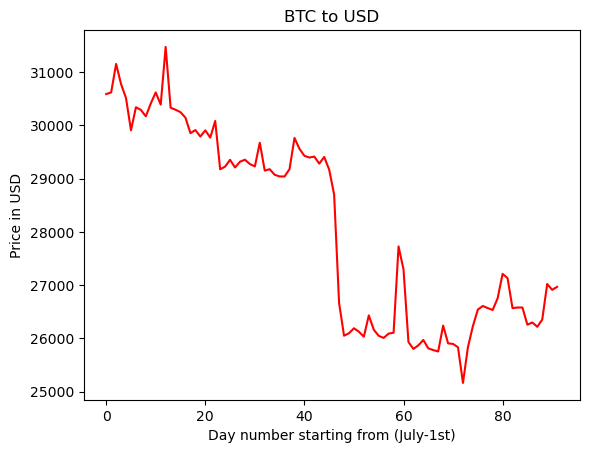

In [12]:
#Plotting Q3 Prices(BTC to USD)
plt.plot(df_q3,"red")
plt.title("BTC to USD")
plt.xlabel("Day number starting from (July-1st)")
plt.ylabel("Price in USD")
plt.show()

**The lowest and highest prices in Q3 occurred on specific days, with the lowest price on day 182 + min_day and the highest price on day 182 + max_day, reflecting the values of Q3_min and Q3_max.**
  

In [14]:
# Printing Day with Min and Max Prices in Q3
min_day = 182 + np.argmin(df_q3)
max_day = 182 + np.argmax(df_q3)

print(f"Lowest price was on day {min_day} ({Q3_min}).")
print(f"Lowest price was on day {max_day} ({Q3_max}).")

Lowest price was on day 254 (25162.65).
Lowest price was on day 194 (31476.05).


**visualization**
- The graph displays the Bitcoin price trends across all four quarters and with each subplot representing a different quarter (Q1, Q2, Q3, and Q4) in different colors: red for Q1, blue for Q2, green for Q3, and yellow for Q4. The x-axis represents the days, while the y-axis shows the BTC price in USD.

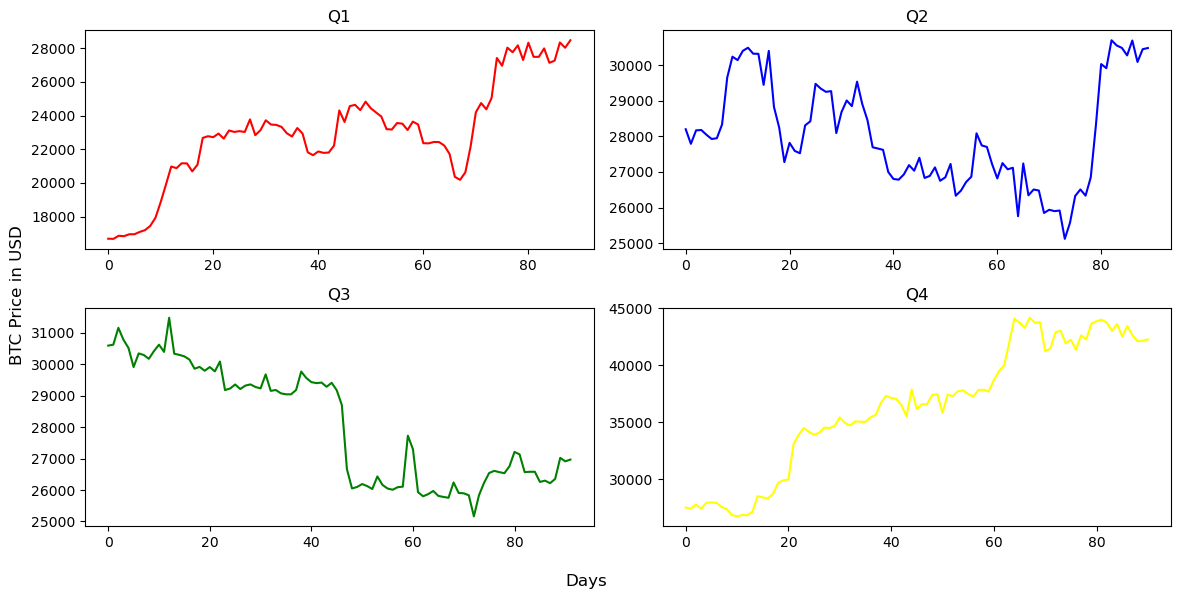

In [16]:
#Plotting All Four Quarters graphs
df_q1 = BTC_df[1:90]
df_q2 = BTC_df[91:181]
df_q4 = BTC_df[274:365]

fig,axe = plt.subplots(2,2,figsize=(12,6))

axe[0,0].plot(df_q1,"red")
axe[0,0].set_title('Q1')
axe[0,1].plot(df_q2,"blue")
axe[0,1].set_title('Q2')
axe[1,0].plot(df_q3,"green")
axe[1,0].set_title('Q3')
axe[1,1].plot(df_q4,"yellow")
axe[1,1].set_title('Q4')



fig.supxlabel("Days")
fig.supylabel("BTC Price in USD")


plt.tight_layout()
plt.show()




**visualization** 
- The boxplot visualizes the distribution of daily price changes in Bitcoin (BTC) during Q3 2023 and highlighting the spread of daily price increases. The green 'x' marker indicates the mean daily price change.

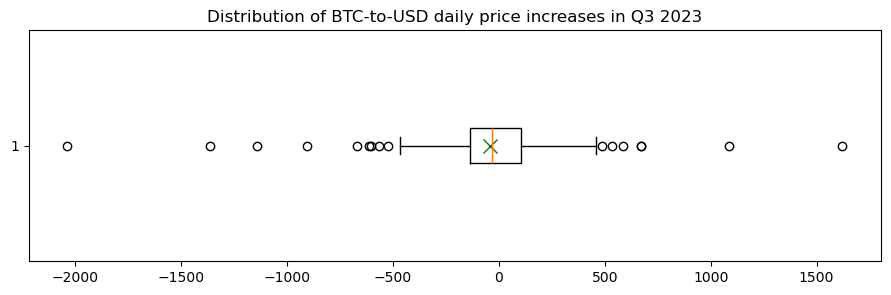

In [18]:
#Boxplot of Daily Changes in Q3
price_diff = np.diff(df_q3)
plt.figure(figsize=(11,3))
plt.boxplot(price_diff,vert=False)


mean_value = np.mean(price_diff)

plt.plot(mean_value,1,"gx",markersize=10,label="Mean")
plt.title("Distribution of BTC-to-USD daily price increases in Q3 2023")

plt.show()

**outliers**
- The report calculates the number of outliers in the daily Bitcoin price changes during Q3 2023. Outliers are days where the price change is significantly higher or lower than most other days. The count of these outlier days is displayed in the results.

In [20]:
# Printing number of outliers
q1_diff = np.percentile(price_diff, 25)
q3_diff = np.percentile(price_diff, 75)
iqr_diff = q3_diff - q1_diff


lower_bound = q1_diff - 1.5 * iqr_diff
upper_bound = q3_diff + 1.5 * iqr_diff


outliers = np.sum((price_diff < lower_bound) | (price_diff > upper_bound))

print("Number of outliers:", outliers)

Number of outliers: 16


**Conclusion**  
This analysis provided insights into the volatility and trends in Bitcoin prices in 2023, with detailed focus on Q3,
the data showed the highest price in Q3 occurred on day", max_day, "and the lowest on day", min_day,Daily price changes revealed", len(outliers), "notable outliers, highlighting potential market-moving events.